In [ ]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
import time
import os

In [ ]:
# Có thể thay data folder bằng đường dẫn đến thư mục chứa dữ liệu của bạn
DATA_FOLDER = r'data/'

In [40]:
# # Cấu hình
# rows_per_file = 20_000_000    # 20 triệu dòng mỗi file (~2GB)
# num_files = 5                # Tổng số file (5 * 2GB ~ 10GB)

# for i in range(1, num_files + 1):
#     print(f"Tạo file {i}/{num_files}...")

#     df = pd.DataFrame({
#         "product_id": np.random.randint(1000, 5000, size=rows_per_file),
#         "revenue": np.random.uniform(100.0, 5000.0, size=rows_per_file).round(2),
#         "quantity": np.random.randint(1, 100, size=rows_per_file),
#         "region": np.random.choice(["North", "South", "East", "West"], size=rows_per_file),
#         "category": np.random.choice(["A", "B", "C", "D"], size=rows_per_file),
#         "discount": np.random.uniform(0.0, 0.5, size=rows_per_file).round(3)
#     })

#     df.to_csv(os.path.join(DATA_FOLDER, f"sales-{i:03d}.csv"), index=False)

# print("✅ Hoàn thành tạo dataset lớn.")

In [48]:
def benchmark_pandas():
    files = [os.path.join(DATA_FOLDER, f) for f in os.listdir(DATA_FOLDER) if f.endswith(".csv")]
    start = time.time()
    
    df_list = [pd.read_csv(file) for file in files]
    full_df = pd.concat(df_list)
    result = full_df["revenue"].mean()
    
    end = time.time()
    print(f"[Pandas] Mean revenue: {result:.2f}, Time: {end - start:.2f}s")


In [ ]:
def benchmark_dask():
    start = time.time()
    
    ddf = dd.read_csv(os.path.join(DATA_FOLDER, "sales-*.csv"))
    revenue_mean = ddf["revenue"].mean()

    result = revenue_mean.compute()
    end = time.time()
    print(f"[Dask] Mean revenue: {result:.2f}, Time: {end - start:.2f}s")
    

In [52]:
if __name__ == "__main__":
    print("Đang benchmark Pandas...")
    benchmark_pandas()
    
    print("\nĐang benchmark Dask...")
    benchmark_dask()

Đang benchmark Pandas...
[Pandas] Mean revenue: 2550.36, Time: 44.41s

Đang benchmark Dask...
[Dask] Mean revenue: 2550.36, Time: 19.40s


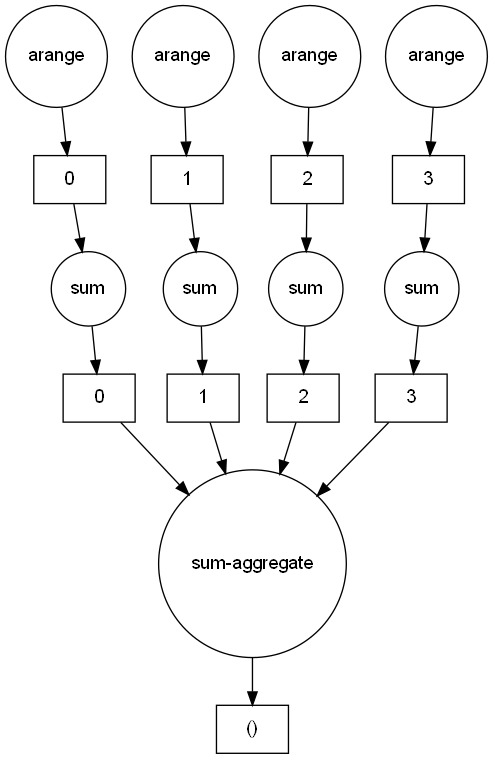

In [1]:
import dask.array as da

# Tạo một Dask Array mẫu để vẽ Task Graph
x = da.arange(10000, chunks=2500)

# Tính tổng các phần tử (sum) - tạo ra task graph thực tế
y = x.sum()

# Vẽ Task Graph trực tiếp trong notebook (hoặc slide)
y.visualize(rankdir="TB")
